# Projet data
        Définition des fonction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import math
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
## bayesien
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# logistic regression 
from sklearn.linear_model import LogisticRegression 
# l'assurance de l'équilibre du dataset ( dealing with imbalanced data)
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
# le centrage des données 
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn import decomposition
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix,roc_curve,auc


#################################### l'import des bibliothèques ##########################################################

In [2]:
def normalisation(dataframe):
    x = dataframe.iloc[:, :-1].values #returns a numpy array
    X_scaler = preprocessing.StandardScaler()
    x_scaled = X_scaler.fit_transform(x)
    dataframe = pd.DataFrame(x_scaled,columns=["V1","V2"])
    return dataframe

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
def grid_serch_cv(model,param_grid,xTrain,yTrain,xTest,yTest):
    kfold =KFold(n_splits=10, random_state=7)
    grid = GridSearchCV(model, param_grid, cv=kfold)
    grid.fit(xTrain,yTrain)
    grid.best_params_
    modelss = grid.best_estimator_
    scor = modelss.score(xTest,yTest)
    return modelss, scor

In [5]:
# prepare models
models = []
models.append(('NB'))
models.append(('LR'))
models.append(('LDA'))
models.append(('KNN'))
models.append(('CART'))
models.append(('SVM'))
models.append(('QDA'))
models.append(('RF'))
def comparaison_classification(models,xTrain,yTrain,xTest,yTest):
    compare = []
    
    for name in models:
        if(name == 'KNN'):
            param_grid = {'n_neighbors': np.arange(2, 40), 'metric':['euclidean','manhattan'] }
            x, y = grid_serch_cv(KNeighborsClassifier(),param_grid,xTrain,yTrain,xTest,yTest)   
            print(name)
            print(x)
            print(y)
        if(name == 'RF'):
            param_grid = {'n_estimators': np.arange(2, 40)}
            x, y = grid_serch_cv(RandomForestClassifier(),param_grid,xTrain,yTrain,xTest,yTest) 
            print(name)
            print(x)
            print(y)
        if(name == 'SVM'):
            param_grid = {'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
            x, y = grid_serch_cv(SVC(),param_grid,xTrain,yTrain,xTest,yTest) 
            print(name)
            print(x)
            print(y)
           
        if(name == 'CART'):
            param_grid =  {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
            x, y = grid_serch_cv(DecisionTreeClassifier(),param_grid,xTrain,yTrain,xTest,yTest)   
            print(name)
            print(x)
            print(y)
        if(name == 'NB'):
            param_grid= {}
            x, y = grid_serch_cv(GaussianNB(),param_grid,xTrain,yTrain,xTest,yTest) 
            print(name)
            print(x)
            print(y)
        if(name == 'LDA'):
            param_grid= {'solver':['svd', 'lsqr', 'eigen'] }
            x, y = grid_serch_cv(LinearDiscriminantAnalysis(),param_grid,xTrain,yTrain,xTest,yTest)
            print(name)
            print(x)
            print(y)
        if(name == 'LR'):
            param_grid= {"penalty" : ['none', 'l1', 'l2', 'elasticnet'],
              "C" :[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
              "solver":['newton-cg', 'lbfgs', 'liblinear'], }
            x, y = grid_serch_cv(LogisticRegression(),param_grid,xTrain,yTrain,xTest,yTest)
            print(name)
            print(x)
            print(y)
        if(name == 'QDA'):
            param_grid= {'reg_param': [0.1, 0.2, 0.3, 0.4, 0.5], }
            x, y = grid_serch_cv(QuadraticDiscriminantAnalysis(),param_grid,xTrain,yTrain,xTest,yTest)
            print(name)
            print(x)
            print(y)

In [6]:
def correlation(df,x_size=5,y_size=5):
    correl = df.corr(method = 'pearson')
    sns.set(rc={'figure.facecolor':'white'})
    fig, ax = plt.subplots(figsize=(x_size,y_size)) 
    correl_final = sns.heatmap(correl, vmin = -1, vmax = 1, center = 0, cmap = "RdBu_r", square = True, ax=ax)
    correl_final.set_title('Correlation', fontsize = 25, loc = 'left')
    return round(correl,2)

In [7]:
def suppression(visa_df_enc):
    column=visa_df_enc.columns
    useless_vars = []
    for col in visa_df_enc.columns:
        if len(visa_df_enc[col].value_counts()) == 1:
            useless_vars.append(col)
    l1=[]
    l=()
    for i in range (0, len(column)-1):
        for j in range (i+1, len(column)):

            if visa_df_enc[column[i]].corr(visa_df_enc[column[j]])>0.95 or visa_df_enc[column[i]].corr(visa_df_enc[column[j]])<-0.95 :
                l=(column[i],column[j])
                l1.append(l)
                useless_vars.append(column[j])

    print('les variables fortement corrélés', l1)
    print(useless_vars) 

    lwd = []

    for i in useless_vars:
        if i not in lwd: lwd.append(i)
        
    print('les variables à supprimer :',lwd)
    for i in lwd:
        visa_df_enc.drop(columns=[i], inplace=True)
    return visa_df_enc

# SYNTHETIC DATA  ( etude exploratoire )
        data spiral

In [8]:
data_spiral = pd.read_csv("data/spiral.txt", sep="\t")
norm_spiral = normalisation(data_spiral)

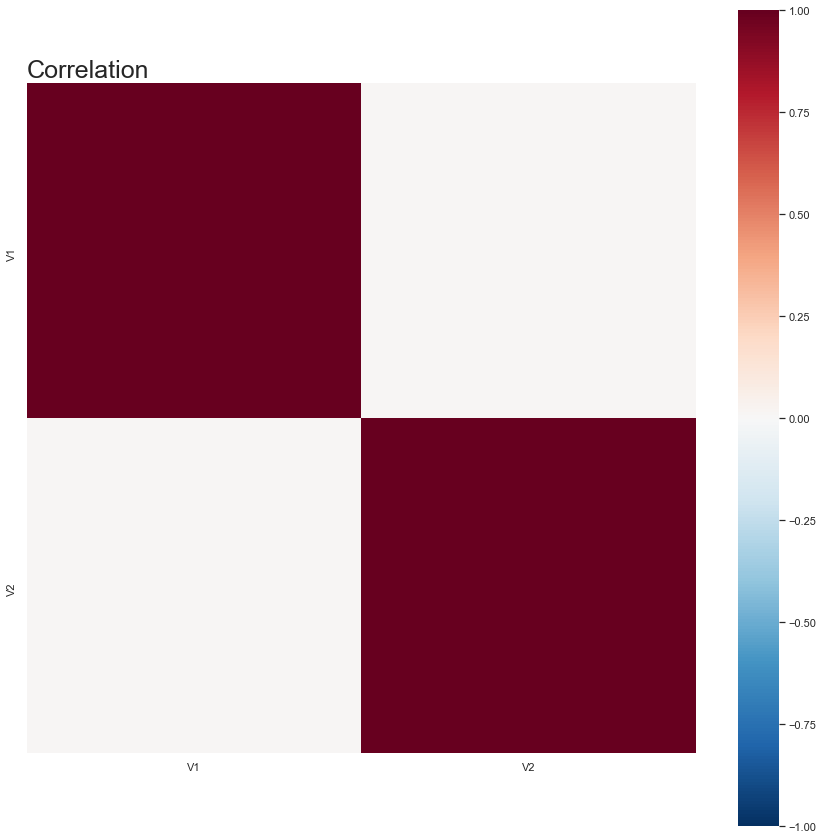

In [13]:
corr = correlation(norm_spiral,15,15)

In [12]:
print("Spiral")
print(data_spiral.iloc[:, :-1].describe())

Spiral
            31.95        7.95
count  311.000000  311.000000
mean    18.364630   16.371704
std      7.270992    6.861701
min      3.000000    2.900000
25%     12.875000   11.375000
50%     18.200000   16.050000
75%     23.275000   21.425000
max     31.650000   31.650000


{'whiskers': [<matplotlib.lines.Line2D at 0x1f86f102550>,
 'caps': [<matplotlib.lines.Line2D at 0x1f86f102c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f86f1021f0>,
 'medians': [<matplotlib.lines.Line2D at 0x1f86f10e310>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f86f10e670>,
 'means': []}

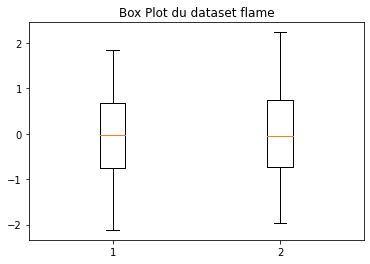

In [12]:
fig2, ax2 = plt.subplots()
ax2.set_title('Box Plot du dataset flame')
ax2.boxplot(norm_spiral)

        data flame

In [13]:
data_flame = pd.read_csv("data/flame.txt", sep="\t")
norm_flame = normalisation(data_flame)

In [ ]:
corr = correlation(norm_flame,15,15)

In [14]:
print("Flame")
print(data_flame.iloc[:, :-1].describe())

Flame
             1.85        27.8
count  239.000000  239.000000
mean     7.346653   20.899791
std      3.189473    3.360983
min      0.500000   14.450000
25%      5.275000   18.225000
50%      7.300000   20.700000
75%      9.325000   23.525000
max     14.200000   27.600000


{'whiskers': [<matplotlib.lines.Line2D at 0x1f86f176ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f86f1845e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f86f176b80>,
 'medians': [<matplotlib.lines.Line2D at 0x1f86f184ca0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f86f190040>,
 'means': []}

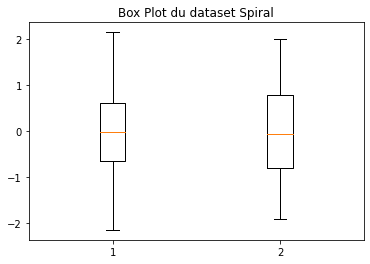

In [15]:
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot du dataset Spiral')
ax1.boxplot(norm_flame)

        data aggregation

In [16]:
data_agg = pd.read_csv("data/aggregation.txt", sep="\t")
norm_agg=normalisation(data_agg)

In [ ]:
corr = correlation(norm_agg,15,15)

In [17]:

print("Aggregation")
print(data_agg.iloc[:, :-1].describe())

Aggregation
            15.55       28.65
count  787.000000  787.000000
mean    19.571919   14.153367
std      9.927317    8.078317
min      3.350000    1.950000
25%     11.150000    7.025000
50%     18.300000   11.700000
75%     30.700000   21.950000
max     36.550000   29.150000


{'whiskers': [<matplotlib.lines.Line2D at 0x1f86f1f2520>,
 'caps': [<matplotlib.lines.Line2D at 0x1f86f1f2be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f86f1f21c0>,
 'medians': [<matplotlib.lines.Line2D at 0x1f86f1fa2e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f86f1fa640>,
 'means': []}

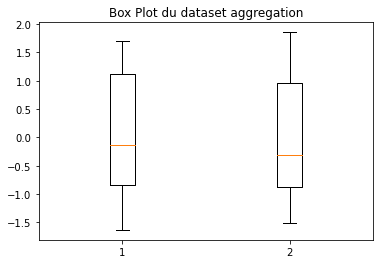

In [18]:
fig3, ax3 = plt.subplots()
ax3.set_title('Box Plot du dataset aggregation')
ax3.boxplot(norm_agg)

# SYTHETIC DATA ( comparaison ) 

In [19]:
xTrains, xTests, yTrains, yTests = train_test_split(norm_spiral, data_spiral.iloc[:,-1],test_size=0.2,random_state=42)
comparaison_classification(models,xTraina,yTraina,xTesta,yTesta)

In [20]:
xTrainf, xTestf, yTrainf, yTestf = train_test_split(norm_flame, data_flame.iloc[:,-1],test_size=0.2,random_state=42)
comparaison_classification(models,xTraina,yTraina,xTesta,yTesta)

In [24]:
xTraina, xTesta, yTraina, yTesta = train_test_split(norm_agg, data_agg.iloc[:,-1],test_size=0.2,random_state=42)
comparaison_classification(models,xTraina,yTraina,xTesta,yTesta) 

{}
0.9936708860759493
{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.9936708860759493
{'solver': 'svd'}
0.9810126582278481
{'metric': 'euclidean', 'n_neighbors': 6}
0.9936708860759493
{'max_leaf_nodes': 7, 'min_samples_split': 2}
1.0
{'kernel': 'linear'}
0.9936708860759493
{'reg_param': 0.1}
0.9936708860759493
{'n_estimators': 4}
1.0


# REAL DATA
        VISA PREMIER

In [53]:
########################################### VISA PREMIER ######################################################
df_visa = pd.read_csv("data/Visapremier.txt", sep="\t")
#Le jeu de donné ne continet donc pas de valeur NaN
df_visa.isna().values.any() 

#On récupere toutes les valeurs qui ne sont pas numériques
str_var = df_visa.select_dtypes(exclude=np.number).columns.tolist()
#Outil pour passer de cat en nombre
from sklearn import decomposition


In [63]:
enc = OrdinalEncoder()
df_visa_tr = df_visa.copy()
print(df_visa_tr)
#on remplace les valeurs categorielles en leur codage numerique
df_visa_tr[str_var]=enc.fit_transform(df_visa[str_var])
Y = df_visa_tr.cartevpr
#suppression de la variable à expliquer (elle existe en double)
df_visa_tr.drop(columns=['cartevp', 'cartevpr'], inplace=True)

      matricul departem  ptvente  sexe  age sitfamil  anciente   csp codeqlt  \
0       148009       31        1  Shom   51     Fmar       238  Pcad       A   
1       442153       82        6  Shom   52     Fmar       270  Pcad       A   
2       552427       97        1  Shom   58     Fmar       139  Pcad       C   
3       556005       40        1  Shom   27     Fcel        99  Psan       B   
4       556686       65        1  Shom   49     Fsep        89  Pemp       A   
...        ...      ...      ...   ...  ...      ...       ...   ...     ...   
1068   7567726       31        1  Sfem   38     Fmar        23  Psan       .   
1069   7572458       31        1  Sfem   43     Fmar        27  Pcad       .   
1070   7574479       32        1  Sfem   49     Fmar        31  Pemp       B   
1071   7580358       65        3  Sfem   27       F.       192  Psan       D   
1072   7589439       65        1  Sfem   34     Fmar       137  Pcad       .   

      nbimpaye  ...     mtbon  nbpaiecb

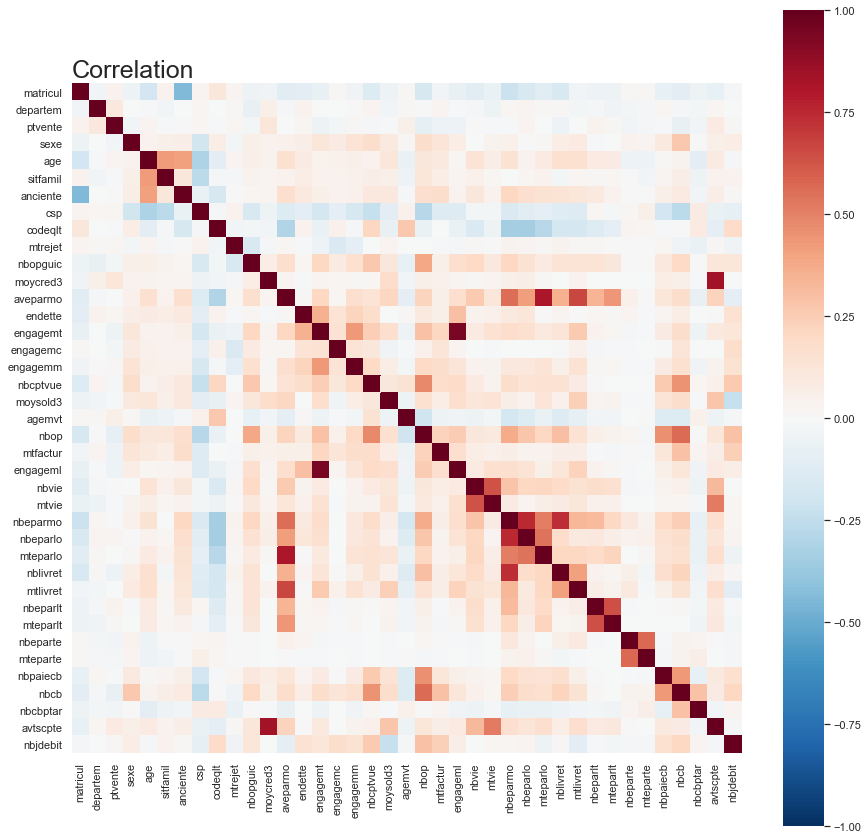

In [135]:
corr = correlation(df_visa_tr,15,15)

In [66]:
#recuperation de la variable à expliquer
df = suppression(df_visa_tr)

les variables fortement corrélés [('sexe', 'sexer'), ('moycred3', 'moycredi'), ('moycred3', 'mteparmo'), ('moycred3', 'nbbon'), ('moycred3', 'mtbon'), ('mtvie', 'aveparfi'), ('mteparmo', 'nbbon'), ('mteparmo', 'mtbon'), ('nbbon', 'mtbon')]
['nbimpaye', 'sexer', 'moycredi', 'mteparmo', 'nbbon', 'mtbon', 'aveparfi', 'nbbon', 'mtbon', 'mtbon']
les variables à supprimer : ['nbimpaye', 'sexer', 'moycredi', 'mteparmo', 'nbbon', 'mtbon', 'aveparfi']


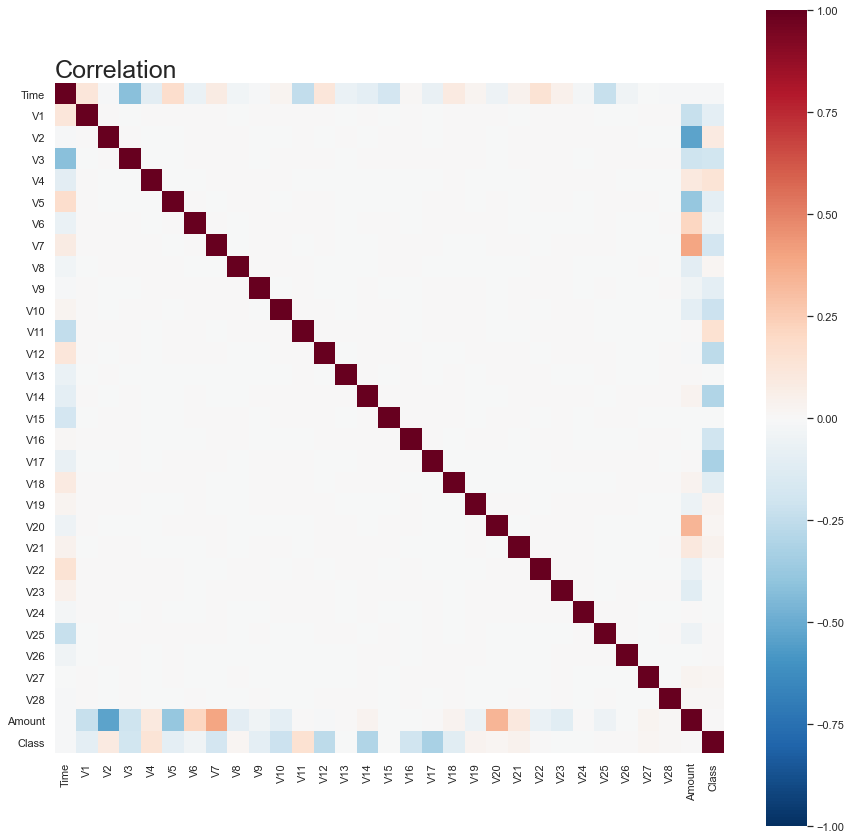

In [136]:
corr = correlation(df,15,15)

In [68]:
df.head()

,matricul,departem,ptvente,sexe,age,sitfamil,anciente,csp,codeqlt,mtrejet,...,mtlivret,nbeparlt,mteparlt,nbeparte,mteparte,nbpaiecb,nbcb,nbcbptar,avtscpte,nbjdebit
0,148009,8.0,1,1.0,51,3.0,238,2.0,1.0,0,...,181794,0,0,0,0,7.0,2,0,1303700,1
1,442153,28.0,6,1.0,52,3.0,270,2.0,1.0,0,...,0,0,0,0,0,43.0,2,0,19856243,0
2,552427,33.0,1,1.0,58,3.0,139,2.0,3.0,0,...,3402,0,0,0,0,1.0,1,0,122745,0
3,556005,12.0,1,1.0,27,1.0,99,7.0,2.0,0,...,30009,0,0,0,0,7.0,2,0,83224,0
4,556686,21.0,1,1.0,49,4.0,89,3.0,1.0,0,...,73351,0,0,0,0,4.0,3,1,494773,15


In [69]:
X_scaled = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df))

In [70]:
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,-1.216610,-0.561090,-0.611483,0.778645,0.711608,0.662635,0.518503,-0.764923,-0.881679,0.046063,...,2.650796,-0.197012,-0.130647,-0.05295,-0.030542,-0.290271,1.071989,-0.359007,1.568812,-0.475239
1,-1.063764,2.173634,3.996113,0.778645,0.795645,0.662635,0.723642,-0.764923,-0.881679,0.046063,...,-0.341355,-0.197012,-0.130647,-0.05295,-0.030542,1.914327,1.071989,-0.359007,26.727365,-0.518112
2,-1.006462,2.857316,-0.611483,0.778645,1.299864,0.662635,-0.116143,-0.764923,0.589615,0.046063,...,-0.285362,-0.197012,-0.130647,-0.05295,-0.030542,-0.657704,-0.080560,-0.359007,-0.032646,-0.518112
3,-1.004603,-0.014145,-0.611483,0.778645,-1.305268,-1.090774,-0.372566,1.811231,-0.146032,0.046063,...,0.152564,-0.197012,-0.130647,-0.05295,-0.030542,-0.290271,1.071989,-0.359007,-0.086240,-0.518112
4,-1.004249,1.216481,-0.611483,0.778645,0.543535,1.539339,-0.436672,-0.249693,-0.881679,0.046063,...,0.865931,-0.197012,-0.130647,-0.05295,-0.030542,-0.473987,2.224537,2.279452,0.471850,0.124983


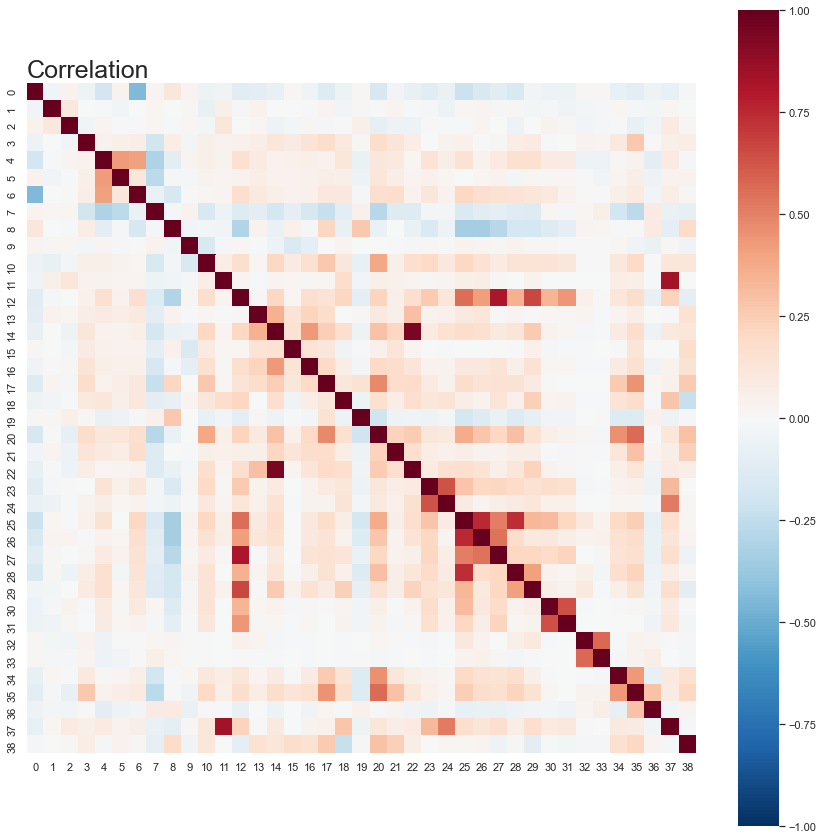

In [137]:
corr = correlation(X_scaled ,15,15)

In [73]:
xTrainv, xTestv, yTrainv, yTestv = train_test_split(X_scaled, Y,test_size=0.2,random_state=42)

In [77]:
comparaison_classification(models,xTrainv,yTrainv,xTestv,yTestv)

NB
GaussianNB()
0.8046511627906977
LR
LogisticRegression(C=1, penalty='l1', solver='liblinear')
0.8930232558139535
LDA
LinearDiscriminantAnalysis()
0.9023255813953488
KNN
KNeighborsClassifier(metric='manhattan')
0.8
CART
DecisionTreeClassifier(max_leaf_nodes=29)
0.9023255813953488
SVM
SVC(kernel='linear')
0.9023255813953488
QDA
QuadraticDiscriminantAnalysis(reg_param=0.1)
0.8
RF
RandomForestClassifier(n_estimators=25)
0.9302325581395349


# REAL DATA 
        CREDIT CARD

In [14]:
df=pd.read_csv("data/creditcard.csv")
df.shape 

(284807, 31)

In [15]:
df.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [17]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [18]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [19]:
print('\nNoFrauds = 0 | Frauds = 1\n')
print(df['Class'].value_counts(normalize = True)*100)


NoFrauds = 0 | Frauds = 1

0    99.827251
1     0.172749
Name: Class, dtype: float64


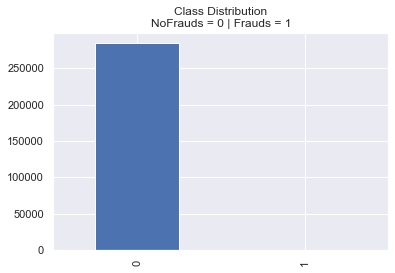

In [20]:
# visualizing throug bar graph
df['Class'].value_counts().plot(kind = 'bar', title = 'Class Distribution\nNoFrauds = 0 | Frauds = 1');

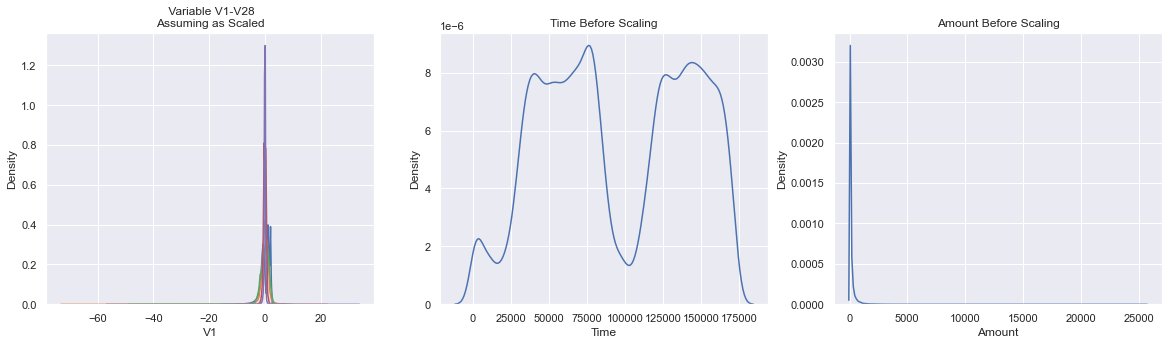

In [21]:
import seaborn as sns
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, figsize=(20, 5))

ax1.set_title(' Variable V1-V28\nAssuming as Scaled')  # plotting only few variables
sns.kdeplot(df['V1'], ax=ax1)                          # kde - kernel density estimate
sns.kdeplot(df['V2'], ax=ax1)
sns.kdeplot(df['V3'], ax=ax1)
sns.kdeplot(df['V25'], ax=ax1)
sns.kdeplot(df['V28'], ax=ax1)

ax2.set_title('Time Before Scaling')
sns.kdeplot(df['Time'], ax=ax2)

ax3.set_title('Amount Before Scaling')            
sns.kdeplot(df['Amount'], ax=ax3)

plt.show()

In [22]:
#Scaling data using RobustScaler
from sklearn.preprocessing import StandardScaler,RobustScaler
rb = RobustScaler()
df['Time'] = rb.fit_transform(df['Time'].values.reshape(-1,1))
df['Amount'] = rb.fit_transform(df['Amount'].values.reshape(-1,1))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


In [23]:
y = df['Class']
x = df.drop('Class',axis = 1)
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size = 0.3,random_state = 42)

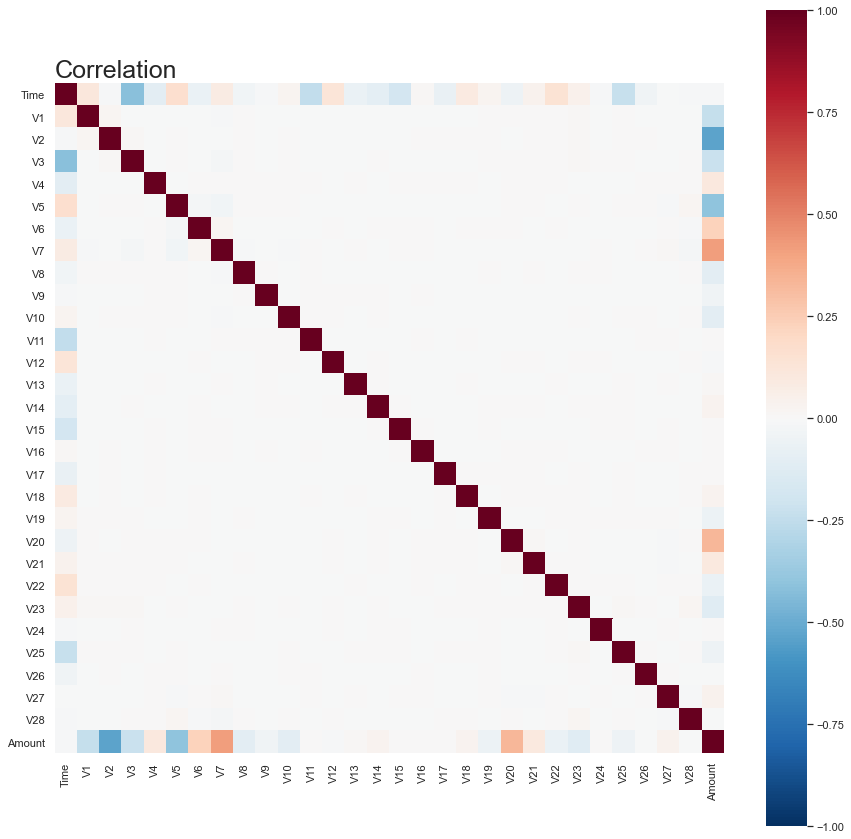

In [24]:
corr = correlation(xTrain ,15,15)

# Application du RESAMPLING

Undersampling

In [25]:
#step 1
xTrain_rus,xTest_rus,yTrain_rus,yTest_rus = train_test_split(xTrain,yTrain,test_size = 0.2,random_state = 42)
xTest_rus

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
92486,-0.243635,-0.458774,1.058575,1.601396,-0.155776,0.062906,-0.545007,0.676288,0.026083,-0.799148,...,0.174175,-0.164037,-0.405277,-0.039874,0.335669,-0.190929,0.050627,0.266763,0.113003,-0.230699
250317,0.824117,2.012187,-0.466878,-1.697965,-0.887008,0.090997,-0.810572,0.135017,-0.160944,0.756242,...,-0.150472,-0.100492,-0.282880,0.224988,0.736593,-0.161295,0.481407,-0.112975,-0.072422,0.209320
250824,0.827019,-1.572701,1.296485,1.161392,-0.724966,-0.361799,-0.435743,0.569783,0.100860,1.024085,...,0.464245,-0.362999,-0.567444,-0.024639,-0.152676,-0.126457,0.046447,0.758924,0.532639,0.391113
61972,-0.406748,1.124490,0.167382,0.786429,1.511145,-0.420098,-0.164766,-0.084126,-0.001791,0.380426,...,-0.152381,-0.002127,0.314658,-0.061235,0.454533,0.647372,-0.265008,0.059545,0.023736,-0.190596
217227,0.659348,2.137124,-0.013173,-1.481363,0.163411,0.440951,-0.598495,0.220965,-0.317814,0.480883,...,-0.135922,-0.347897,-0.818880,0.201708,-0.979837,-0.129991,0.257528,-0.066303,-0.068695,-0.289387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10958,-0.773752,-2.999123,0.290188,-2.405480,2.570433,1.230631,4.066065,-0.214201,1.908664,-0.134771,...,0.125657,-0.157426,-0.256408,-0.368936,1.038155,-0.412945,0.169642,0.641215,-0.287820,3.599525
21575,-0.622047,-0.208777,1.350018,-0.007997,0.914792,-0.035177,-0.999205,0.519241,0.319573,-0.898758,...,-0.094172,0.234375,0.711960,0.080734,0.538596,-0.761174,-0.441535,0.308864,0.159266,-0.294977
31938,-0.565326,-0.345121,1.179420,1.306561,0.056859,0.087563,-0.961701,0.773421,-0.117395,-0.511200,...,0.168397,-0.253386,-0.627104,-0.017422,0.354713,-0.133866,0.069220,0.249654,0.100125,-0.223713
248319,0.812932,0.140660,1.009653,-0.388018,-0.526362,0.869419,-0.883582,0.938156,-0.092034,0.005747,...,-0.008598,-0.343459,-0.856439,0.101884,0.619873,-0.439953,0.110631,0.220519,0.084065,-0.294977


1    287
0    287
Name: target, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


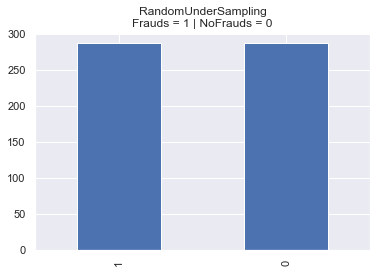

In [26]:
#step 2
rus = RandomUnderSampler()
x_rus,y_rus = rus.fit_sample(xTrain_rus,yTrain_rus)
#converting it to DataFrame to Visualize in pandas
df_x_rus = pd.DataFrame(x_rus)
df_x_rus['target'] = y_rus
print(df_x_rus['target'].value_counts())
print(df_x_rus['target'].value_counts().plot(kind = 'bar',title = 'RandomUnderSampling\nFrauds = 1 | NoFrauds = 0'))

In [27]:
x_rus

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,target
0,-0.118904,-0.704058,1.353796,0.975942,0.822890,-0.297220,-0.660884,0.292827,0.476587,-0.882298,...,0.207373,0.575584,-0.096018,0.532026,-0.251183,-0.342894,0.286108,0.151363,-0.258087,0
1,0.675372,-0.483869,0.871914,-0.316755,-0.637316,0.744613,-0.773253,0.847522,0.128156,-0.493561,...,-0.069045,-0.261459,0.051092,-0.608314,-0.729246,0.172449,0.027616,0.114758,0.108852,0
2,0.430773,0.377056,0.083990,0.186429,-2.075239,0.685576,-0.234455,0.693107,-0.384881,-1.075315,...,-0.134381,-0.277698,-0.151375,0.034840,0.108698,-0.423602,-0.199883,-0.264919,-0.098512,0
3,-0.230383,0.960730,-0.379187,0.057097,-0.539392,-0.776374,-0.956578,-0.062661,-0.109534,1.107219,...,0.083341,0.229536,-0.230258,0.490048,0.606465,-0.671887,0.065751,0.068429,1.486201,0
4,0.501263,-0.461833,1.136641,3.220252,4.140957,-0.171897,1.969213,-0.448843,0.532307,-1.255937,...,0.177882,0.776327,-0.305443,0.733849,-0.091915,0.481123,0.224020,-0.055170,-0.233913,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,-0.311247,0.340391,2.015233,-2.777330,3.812024,-0.461729,-1.152022,-2.001959,0.548681,-2.344042,...,0.299769,-0.583283,-0.187696,-0.329256,0.732328,0.058080,0.553143,0.318832,-0.282960,1
570,-0.792678,1.189784,0.942289,0.082334,3.024050,0.412406,-0.214415,0.053558,-0.110353,0.883798,...,-0.502636,-1.047398,-0.056752,-0.340688,0.541235,-0.098300,-0.003041,0.049819,-0.254454,1
571,0.108143,-10.300820,6.483095,-15.076363,6.554191,-8.880252,-4.471672,-14.900689,3.840170,-4.358441,...,1.508748,1.041642,-0.682790,0.573544,-1.602389,-0.393521,-0.468893,0.105920,-0.293440,1
572,-0.756118,-15.271362,8.326581,-22.338591,11.885313,-8.721334,-2.324307,-16.196419,0.512882,-6.333685,...,-2.356896,1.068019,1.085617,-1.039797,-0.182006,0.649921,2.149247,-1.406811,-0.293440,1


In [28]:
lr = LogisticRegression()
lr.fit(x_rus.iloc[:,:-1],y_rus)

#step 4
yPred_rus = lr.predict(xTest_rus)

rus_accuracy = accuracy_score(yTest_rus,yPred_rus)
rus_classReport = classification_report(yTest_rus,yPred_rus)
#print('\nTrain-Accuracy %0.2f%%'%(rus_accuracy*100),
#      '\nTrain-ClassificationReport:\n',rus_classReport,'\n')

#step 5
yPred_actual = lr.predict(xTest)
test_accuracy = accuracy_score(yTest,yPred_actual)
test_classReport = classification_report(yTest,yPred_actual)
print('\nTest-Accuracy %0.2f%%'%(test_accuracy*100),
      '\n\nTest-ClassificationReport:\n',test_classReport)


Test-Accuracy 96.20% 

Test-ClassificationReport:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     85307
           1       0.04      0.94      0.07       136

    accuracy                           0.96     85443
   macro avg       0.52      0.95      0.53     85443
weighted avg       1.00      0.96      0.98     85443



In [114]:
yTest_rus

104878    0
105552    0
9128      0
201800    0
60023     0
         ..
150187    0
38317     0
121811    0
56686     0
125344    0
Name: Class, Length: 45569, dtype: int64

In [29]:
comparaison_classification(models,x_rus.iloc[:,:-1],y_rus,xTest_rus,yTest_rus)

NB
GaussianNB()
0.9591703659117699
LR
LogisticRegression(C=1, solver='newton-cg')
0.960574825069596
LDA
LinearDiscriminantAnalysis()
0.9791839089107918
KNN
KNeighborsClassifier(metric='euclidean', n_neighbors=7)
0.9800366162566148
CART
DecisionTreeClassifier(max_leaf_nodes=5, min_samples_split=3)
0.9355453565069094
SVM
SVC()
0.9806636069520729
QDA
QuadraticDiscriminantAnalysis(reg_param=0.5)
0.944824818799689
RF
RandomForestClassifier(n_estimators=24)
0.9730394000953025


Oversampling

1    159204
0    159204
Name: target, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


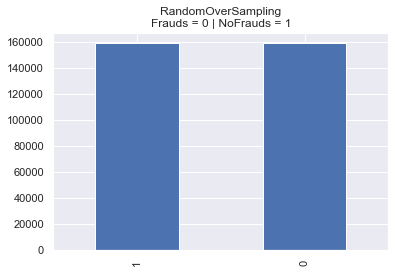

In [138]:
#step 1
xTrain_ros,xTest_ros,yTrain_ros,yTest_ros = train_test_split(xTrain,yTrain,test_size=0.2,random_state=42)

#step 2
ros = RandomOverSampler()
x_ros,y_ros = ros.fit_sample(xTrain_ros,yTrain_ros)

#Converting it to dataframe to visualize in pandas
df_x_ros = pd.DataFrame(x_ros)
df_x_ros['target'] = y_ros
print(df_x_ros['target'].value_counts())
print(df_x_ros['target'].value_counts().plot(kind = 'bar',title = 'RandomOverSampling\nFrauds = 0 | NoFrauds = 1'))


In [ ]:
comparaison_classification(models,x_ros.iloc[:,:-1],y_ros,xTest_ros,yTest_ros)

NB
GaussianNB()
0.9740175055802172


KeyboardInterrupt: 

        SMOTE

1    159204
0    159204
Name: target, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


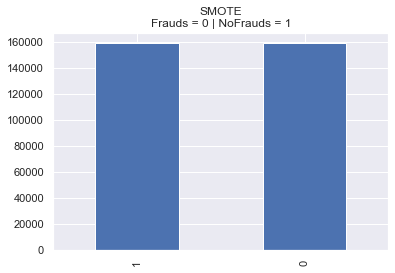

In [139]:
#step 1
xTrain_smote,xTest_smote,yTrain_smote,yTest_smote = train_test_split(xTrain,yTrain,test_size = 0.2,random_state = 42 )

#step2
smote = SMOTE()
x_smote,y_smote = smote.fit_sample(xTrain_smote,yTrain_smote)
#Converting it to dataframe to visualize in pandas
df_x_smote = pd.DataFrame(x_smote)
df_x_smote['target'] = y_smote
print(df_x_smote['target'].value_counts())
print(df_x_smote['target'].value_counts().plot(kind = 'bar',title = 'SMOTE\nFrauds = 0 | NoFrauds = 1'))

In [ ]:
comparaison_classification(models,x_smote.iloc[:,:-1],y_smote,xTest_smote,yTest_smote)

In [10]:

k = np.arange(2,40)
train_score, val_score= validation_curve(knn2, xTrain, yTrain, 'n_neighbors', k, cv =5)
print(val_score.mean(axis= 1))
val_score.mean(axis= 1)
indices = [i for i, x in enumerate(val_score.mean(axis= 1)) if x == max(val_score.mean(axis= 1))]


[1.         1.         0.996      0.99191837 0.99191837 0.9797551
 0.97983673 0.97167347 0.9717551  0.9435102  0.9515102  0.9195102
 0.91934694 0.87926531 0.87918367 0.83485714 0.85085714 0.79877551
 0.81085714 0.75853061 0.76261224 0.71828571 0.70220408 0.69804082
 0.66987755 0.64563265 0.62563265 0.61346939 0.62146939 0.60555102
 0.57697959 0.55697959 0.55297959 0.51657143 0.52457143 0.5122449
 0.49608163 0.47183673]
